Ahmet Kasım Toptas

21627667

Assignment 3 - PySpark Assignment

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

## Problem <a class="anchor" id="problem"></a>

This assignment aims to try to find out how we can diagnose breast cancer, using the machine  learning  methods  using  Spark  Environmentfrom  the  features  created  by digitizing the images of breast cancer. These features define the properties of the cell nuclei  in  the  image.  Our  primary  purpose  here  is  to  cluster  and  classify  the  data according  to  the  diagnosis  (M  =  malignant,  B  =  benign).  We  should  be  able  to predict  the  disease  most  accurately  by  using  clustering  and  classification  methodsusing  Spark Environment.  If  there  are  missing  values in  the  data  set,  we  should explain how to deal with them. Also, we don't have to use all the features in the data set.  After  analyzing  the  dataset,  we  can  choose  which  features  you  will  use  for clustering and classification.

## Data Understanding<a class="anchor" id="data_understanding"></a>


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"


In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
import pyspark
from pyspark.sql import SQLContext
from pyspark import SparkContext


sc = SparkContext.getOrCreate()

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [0]:
sqlContext = SQLContext(sc)

In [0]:
df = sqlContext.read.options(header=True,inferSchema=True).csv("/content/data.csv")

In [190]:
df.show()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----+
|      id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|_c32|
+--------+---------+-----------+------

In [191]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- diagnosis: string (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- area_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- area_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radi

I showed all features with their data types. There is _c32 column. There could be mistake.

In [192]:
df.summary().show()

+-------+--------------------+---------+------------------+-----------------+-----------------+-----------------+--------------------+-------------------+-------------------+--------------------+--------------------+----------------------+------------------+------------------+------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+------------------+-----------------+--------------------+-------------------+-------------------+--------------------+-------------------+-----------------------+----+
|summary|                  id|diagnosis|       radius_mean|     texture_mean|   perimeter_mean|        area_mean|     smoothness_mean|   compactness_mean|     concavity_mean| concave points_mean|       symmetry_mean|fractal_dimension_mean|         radius_se|        texture_se|      perimeter_se|          area_se|       smoothness_se|      compactness_

I showed summary of dataset. As I can ses _c32 is mistake. I will delete this column.

In [193]:
df.select('diagnosis').distinct().rdd.map(lambda r: r[0]).collect()

['B', 'M']

As I see there is 2 unique value in diagnosis column. We don't need to change anything in these feature.

In [194]:
print((df.count(), len(df.columns)))  #Shape of dataframe

(569, 33)


We have 569 rows and 33 columns. There is named _c2 column which is null. I have to delete this column.

In [195]:
df.describe()

DataFrame[summary: string, id: string, diagnosis: string, radius_mean: string, texture_mean: string, perimeter_mean: string, area_mean: string, smoothness_mean: string, compactness_mean: string, concavity_mean: string, concave points_mean: string, symmetry_mean: string, fractal_dimension_mean: string, radius_se: string, texture_se: string, perimeter_se: string, area_se: string, smoothness_se: string, compactness_se: string, concavity_se: string, concave points_se: string, symmetry_se: string, fractal_dimension_se: string, radius_worst: string, texture_worst: string, perimeter_worst: string, area_worst: string, smoothness_worst: string, compactness_worst: string, concavity_worst: string, concave points_worst: string, symmetry_worst: string, fractal_dimension_worst: string, _c32: string]

In [0]:
df=df.drop('_c32')

In [197]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- diagnosis: string (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- area_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- area_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radi

In [198]:
print((df.count(), len(df.columns)))  #Shape of dataframe

(569, 32)


We have 569 rows and 32 columns in dataframe. I see I deleted _c32 column correctly.

In [199]:
df.summary().show()

+-------+--------------------+---------+------------------+-----------------+-----------------+-----------------+--------------------+-------------------+-------------------+--------------------+--------------------+----------------------+------------------+------------------+------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+------------------+-----------------+--------------------+-------------------+-------------------+--------------------+-------------------+-----------------------+
|summary|                  id|diagnosis|       radius_mean|     texture_mean|   perimeter_mean|        area_mean|     smoothness_mean|   compactness_mean|     concavity_mean| concave points_mean|       symmetry_mean|fractal_dimension_mean|         radius_se|        texture_se|      perimeter_se|          area_se|       smoothness_se|      compactness_se|  

In [200]:
df.groupBy("diagnosis").count().show()

+---------+-----+
|diagnosis|count|
+---------+-----+
|        B|  357|
|        M|  212|
+---------+-----+



In [201]:
df = df.replace(to_replace={'B': '0', 'M': '1'}, subset=['diagnosis'])
df = df.withColumn("diagnosis",df["diagnosis"].cast('float'))

df.show()

pandas_df = df.toPandas()


+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|      id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+--------+---------+-----------+------------+---

I changed diagnosis column to float.

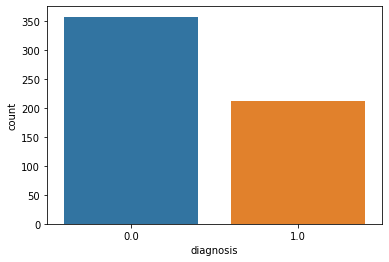

In [202]:
sns.countplot(pandas_df.diagnosis)

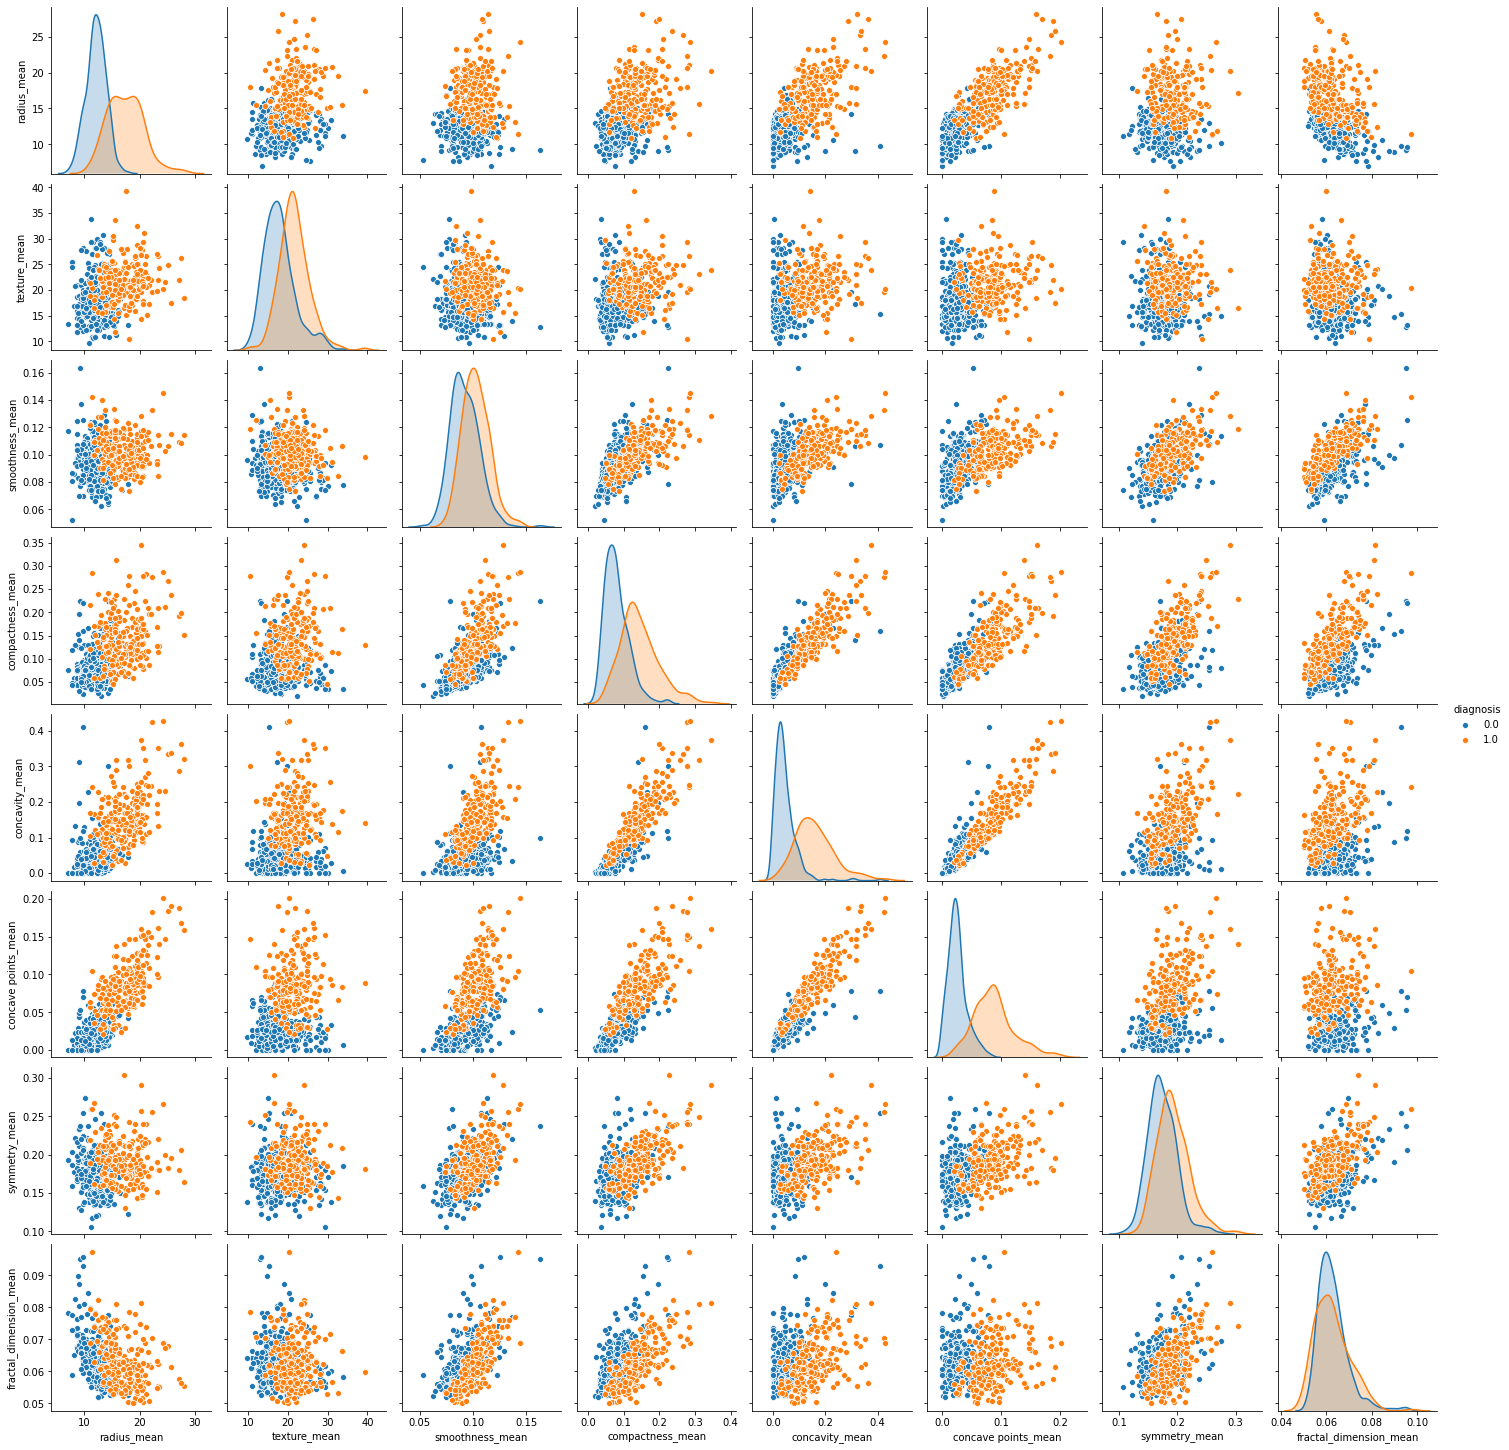

In [203]:
sns.pairplot(pandas_df.loc[:,["diagnosis","radius_mean","texture_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"]], hue = "diagnosis")


I showed diagnosies pair plots with some features.

#Data Preparation

I could not use chiSqu feature selection of MlLib so I did with correlation map with pandas and seaborn.

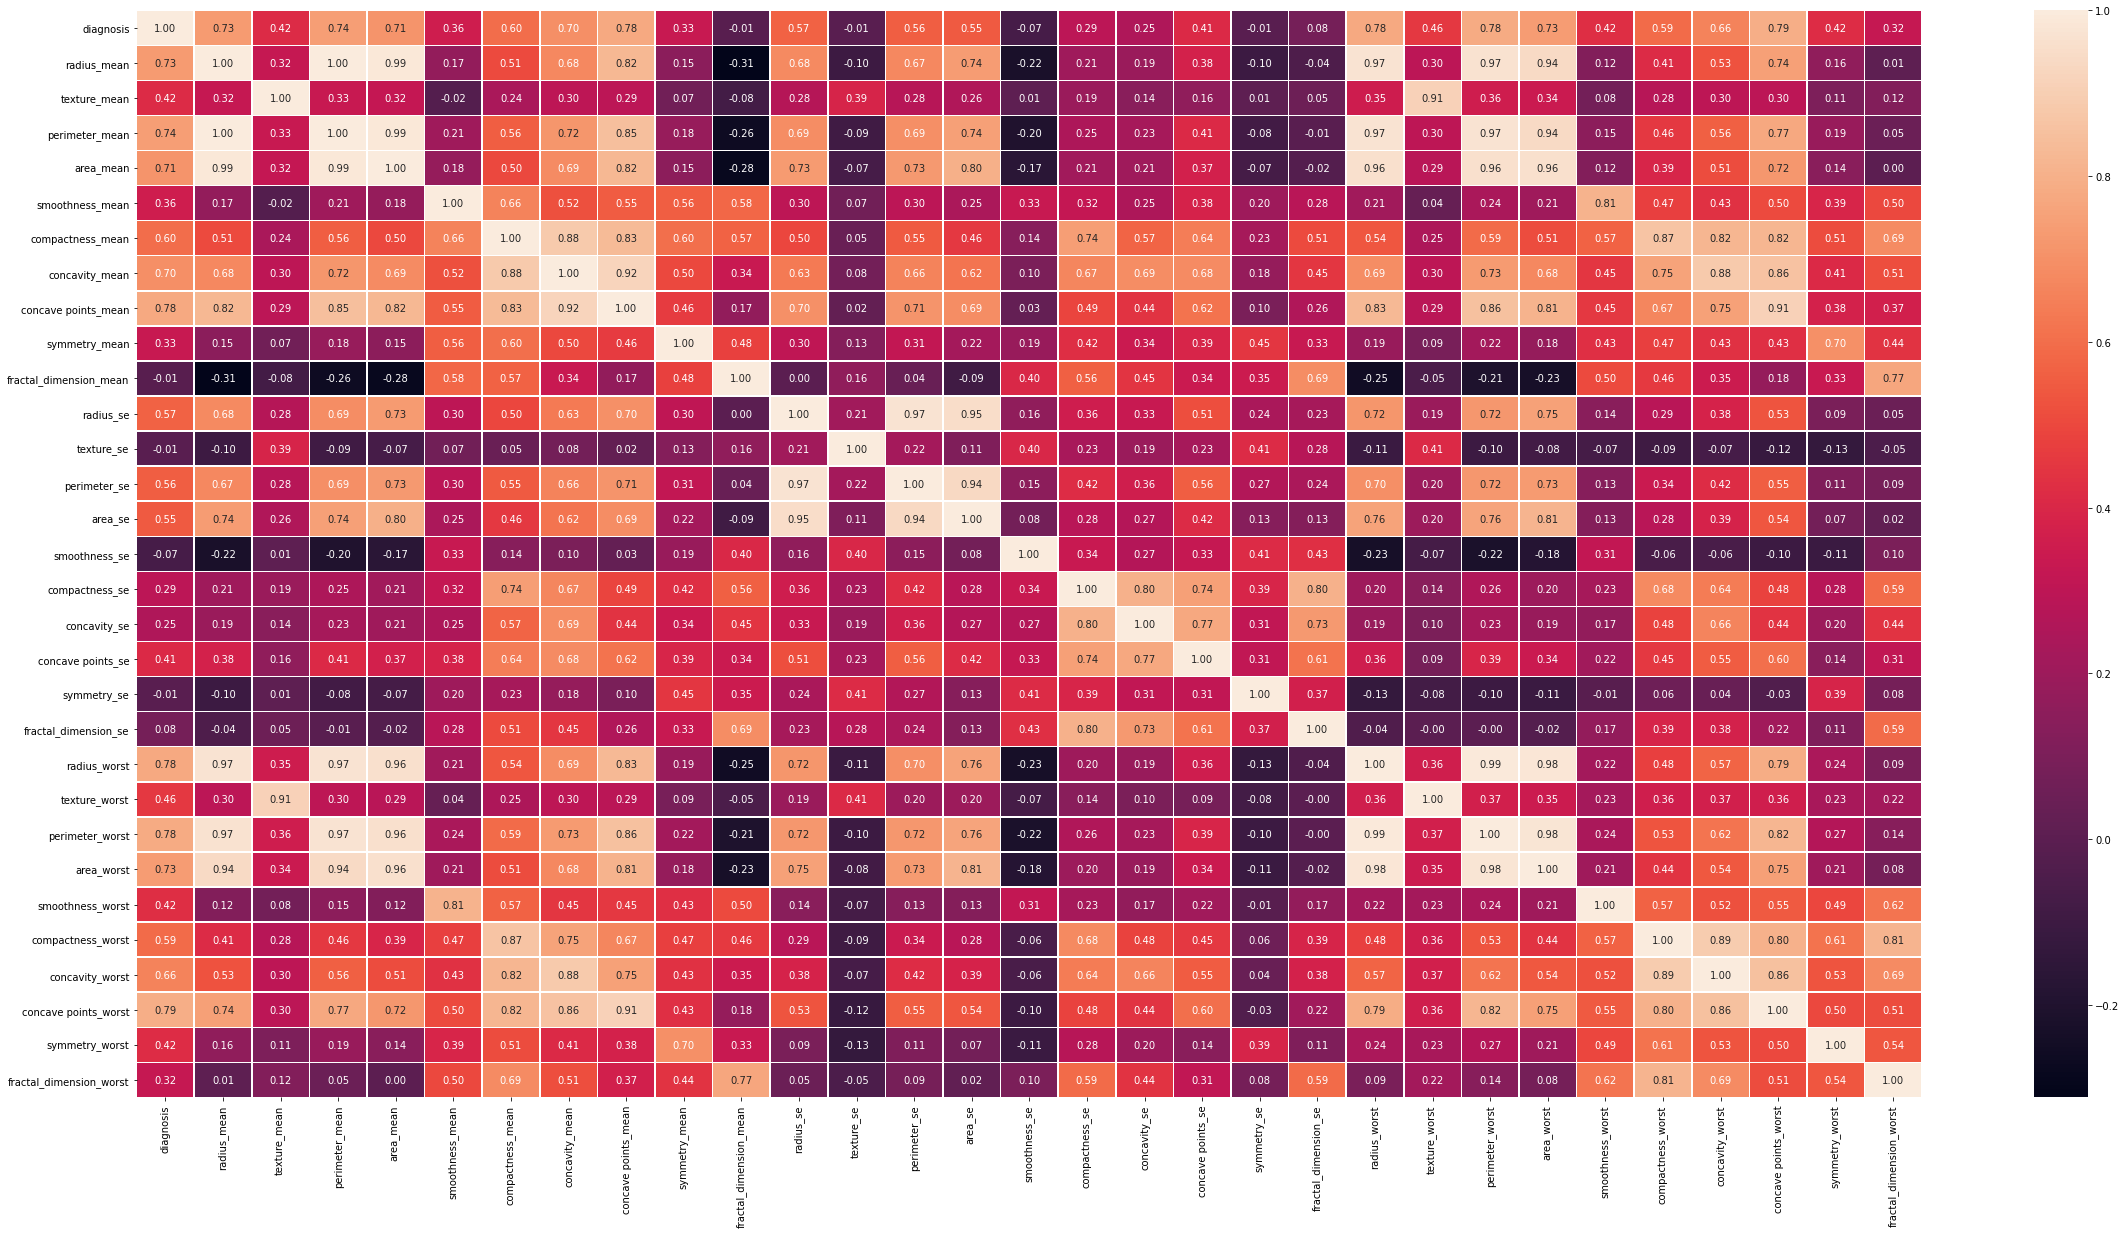

In [204]:
corr = pandas_df.iloc[:,1:].corr()
pandas_df.drop(axis=1,columns="diagnosis",inplace=True)
sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

We have radius, perimeter and area which are interrelated each other.

compactness worst and concavity_worts looks like similar. But They affect other features diffrently so I don't delete them. 

There are some columns look like they don't affect diagnosis. i.e fractal_dimension,texture_se... But they affect other features. So I decided them not deleted.

We see radius,perimeter and perimeter colums has almost same corelation with other features. I drop these columns directly

In [205]:
columns_to_drop = ["perimeter_mean","area_mean","perimeter_se","area_se","perimeter_worst","area_worst"]
df_dropped = df.drop(*columns_to_drop)
df.show()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|      id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+--------+---------+-----------+------------+---

In [206]:
df_dropped.printSchema()

root
 |-- id: integer (nullable = true)
 |-- diagnosis: float (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radius_worst: double (nullable = true)
 |-- texture_worst: double (nullable = true)
 |-- smoothness_worst: double (nullable = true)
 |-- compactness_worst: double (nullable = 

In [0]:
orDataCluster = df.drop("diagnosis")
featuredDataCluster = df_dropped.drop("diagnosis")

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler,MinMaxScalerModel
from pyspark.ml.feature import VectorAssembler

def minMaxScalerFunc(cluster):
  assembler = VectorAssembler(inputCols=list(set(cluster.columns)-{"id"}), outputCol="features")
  scaler = MinMaxScaler(inputCol="features", outputCol="nor_features")
  pipeline = Pipeline(stages=[assembler, scaler])
  scalerModel = pipeline.fit(cluster)
  scaledData = scalerModel.transform(cluster).select('id', 'features', 'nor_features')
  scaledData.show(1,False)
  return scaledData


This is normalization function. It also make dataset ready for mlLib. It uses vector assembler which is necessary for mlLib.

#Clustering

In [209]:
featuredScaledData=minMaxScalerFunc(featuredDataCluster)          #less featured(with 24 columns)
originalScaledData=minMaxScalerFunc(orDataCluster)                #with every feature


+------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|id    |features                                                                                                                                                                     |nor_features                                                                                                                                                              

In [210]:
print((featuredScaledData.count(), len(featuredScaledData.columns)))  

(569, 3)


In [211]:
featuredScaledData.printSchema()
originalScaledData.printSchema()


root
 |-- id: integer (nullable = true)
 |-- features: vector (nullable = true)
 |-- nor_features: vector (nullable = true)

root
 |-- id: integer (nullable = true)
 |-- features: vector (nullable = true)
 |-- nor_features: vector (nullable = true)



In [0]:
def grapher(pandasData):
  f, axes = plt.subplots(4, 2,figsize=(15,8))
  sns.scatterplot(x="radius_mean", y="texture_mean",
                hue="prediction", style="prediction", data=pandasData,ax=axes[0][0])

  sns.scatterplot(x="radius_mean", y="texture_mean",
                     hue="diagnosis", style="diagnosis", data=pandasData,ax=axes[0][1])


  sns.scatterplot(x="concavity_se", y="concave points_se",
                hue="prediction", style="prediction", data=pandasData,ax=axes[1][0])

  sns.scatterplot(x="concavity_se", y="concave points_se",
                     hue="diagnosis", style="diagnosis", data=pandasData,ax=axes[1][1])
  

  sns.scatterplot(x="smoothness_worst", y="symmetry_worst",
                hue="prediction", style="prediction", data=pandasData,ax=axes[2][0])

  sns.scatterplot(x="smoothness_worst", y="symmetry_worst",
                     hue="diagnosis", style="diagnosis", data=pandasData,ax=axes[2][1])


  sns.scatterplot(x="texture_mean", y="compactness_se",
                hue="prediction", style="prediction", data=pandasData,ax=axes[3][0])

  sns.scatterplot(x="texture_mean", y="compactness_se",
                     hue="diagnosis", style="diagnosis", data=pandasData,ax=axes[3][1])


  f.tight_layout()

  plt.show()

  accuracy = (pandasData.prediction==pandasData.diagnosis).mean()
  if (accuracy)<0.5:
    accuracy = 1-accuracy
  return accuracy



In [213]:
from pyspark.ml.clustering import KMeans,KMeansModel

# training feautured and not normalized data
kmeans = KMeans().setK(2).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(featuredScaledData)

df_featOr_pred = model.transform(featuredScaledData).select("id","prediction")
df_featOr_pred.show()

+--------+----------+
|      id|prediction|
+--------+----------+
|  842302|         1|
|  842517|         0|
|84300903|         0|
|84348301|         1|
|84358402|         1|
|  843786|         1|
|  844359|         0|
|84458202|         0|
|  844981|         0|
|84501001|         0|
|  845636|         0|
|84610002|         0|
|  846226|         0|
|  846381|         0|
|84667401|         0|
|84799002|         0|
|  848406|         0|
|84862001|         0|
|  849014|         0|
| 8510426|         1|
+--------+----------+
only showing top 20 rows



In [214]:
df_featOr_pred = df_featOr_pred.join(df, "id")
df_featOr_pred.show(5)


+--------+----------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|      id|prediction|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+--------+----------+-----

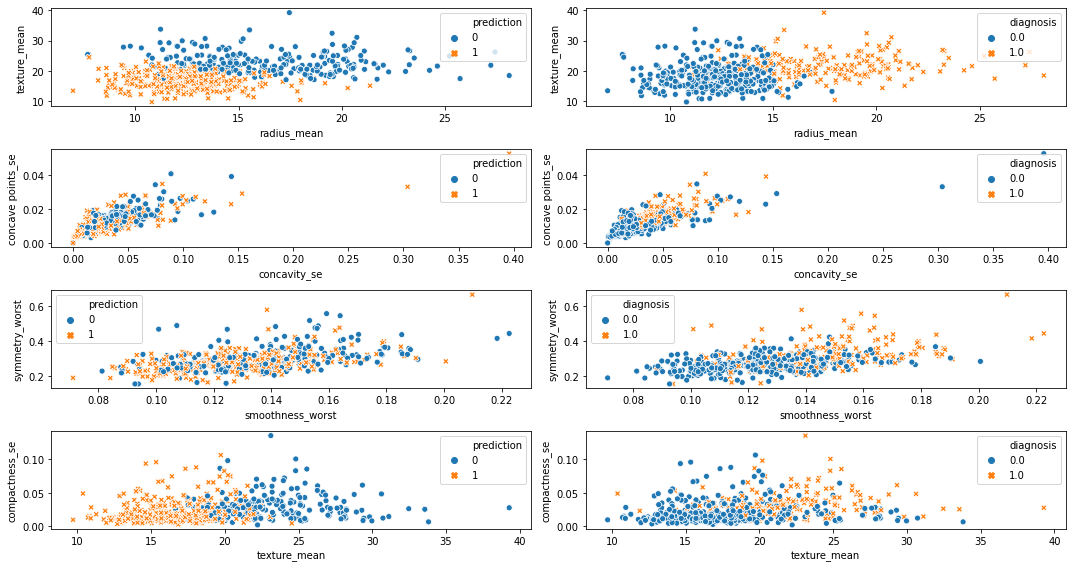

Accuracy of feautured and not normalized data 0.8488576449912126


In [215]:
acc_featOr=grapher(df_featOr_pred.toPandas())
acc_featOr
print("Accuracy of feautured and not normalized data "+str(acc_featOr))

In [216]:
# training original and not normalized data
kmeans = KMeans().setK(2).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(originalScaledData)

df_orOr_pred = model.transform(originalScaledData).select("id","prediction")
df_orOr_pred.show()

+--------+----------+
|      id|prediction|
+--------+----------+
|  842302|         0|
|  842517|         0|
|84300903|         0|
|84348301|         1|
|84358402|         0|
|  843786|         1|
|  844359|         0|
|84458202|         1|
|  844981|         1|
|84501001|         1|
|  845636|         1|
|84610002|         0|
|  846226|         0|
|  846381|         1|
|84667401|         1|
|84799002|         1|
|  848406|         1|
|84862001|         0|
|  849014|         0|
| 8510426|         1|
+--------+----------+
only showing top 20 rows



In [217]:
df_orOr_pred = df_orOr_pred.join(df, "id")
df_orOr_pred.show(5)

+--------+----------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|      id|prediction|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+--------+----------+-----

<Figure size 432x288 with 0 Axes>

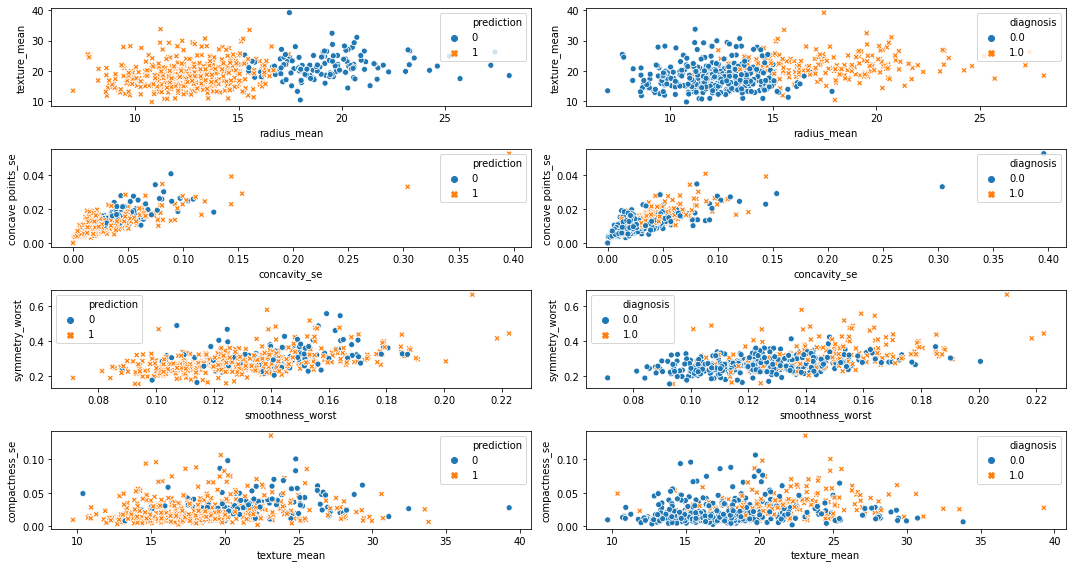

Accuracy of original and not normalized data 0.8541300527240774


In [218]:
plt.clf()
acc_orOr=grapher(df_orOr_pred.toPandas())
print("Accuracy of original and not normalized data "+str(acc_orOr))

In [219]:
# training featured and normalized data
kmeans = KMeans().setK(2).setSeed(1).setFeaturesCol("nor_features")
model = kmeans.fit(featuredScaledData)

df_featNor_pred = model.transform(featuredScaledData).select("id","prediction")
df_featNor_pred.show()


+--------+----------+
|      id|prediction|
+--------+----------+
|  842302|         0|
|  842517|         0|
|84300903|         0|
|84348301|         0|
|84358402|         0|
|  843786|         0|
|  844359|         0|
|84458202|         0|
|  844981|         0|
|84501001|         0|
|  845636|         1|
|84610002|         0|
|  846226|         0|
|  846381|         1|
|84667401|         0|
|84799002|         0|
|  848406|         1|
|84862001|         0|
|  849014|         0|
| 8510426|         1|
+--------+----------+
only showing top 20 rows



In [220]:
df_featNor_pred = df_featNor_pred.join(df, "id")
df_featNor_pred.show(5)

+--------+----------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|      id|prediction|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+--------+----------+-----

           id  prediction  ...  symmetry_worst  fractal_dimension_worst
0      842302           0  ...          0.4601                  0.11890
1      842517           0  ...          0.2750                  0.08902
2    84300903           0  ...          0.3613                  0.08758
3    84348301           0  ...          0.6638                  0.17300
4    84358402           0  ...          0.2364                  0.07678
..        ...         ...  ...             ...                      ...
564    926424           0  ...          0.2060                  0.07115
565    926682           0  ...          0.2572                  0.06637
566    926954           0  ...          0.2218                  0.07820
567    927241           0  ...          0.4087                  0.12400
568     92751           1  ...          0.2871                  0.07039

[569 rows x 33 columns]


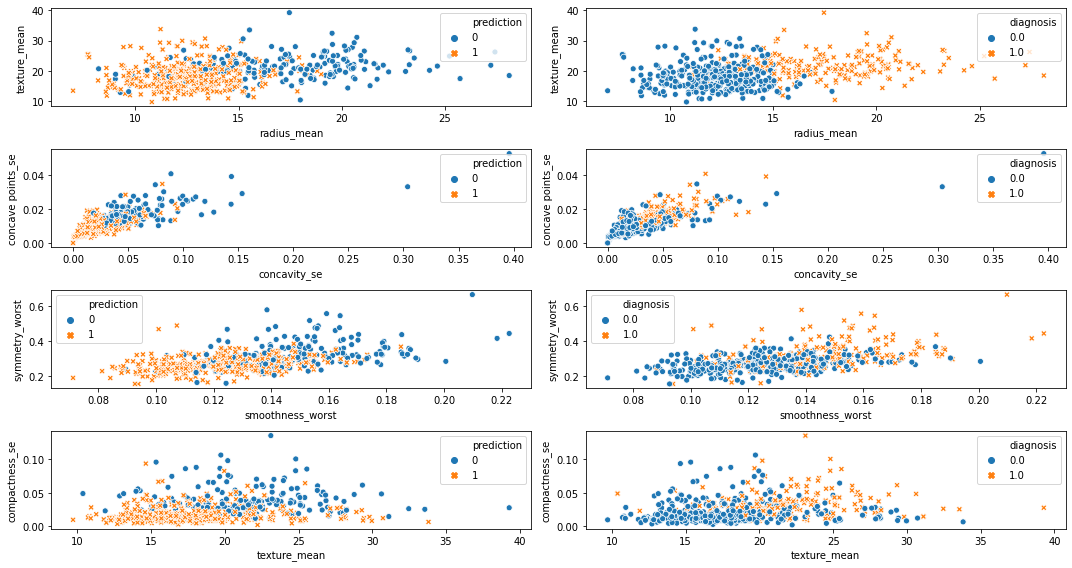

Accuracy of featured and normalized data 0.8980667838312829


In [221]:
print(df_featNor_pred.toPandas())
acc_featNor=grapher(df_featNor_pred.toPandas())
print("Accuracy of featured and normalized data "+str(acc_featNor))

In [222]:
# training original and normalized data
kmeans = KMeans().setK(2).setSeed(1).setFeaturesCol("nor_features")
model = kmeans.fit(originalScaledData)

df_orNor_pred = model.transform(originalScaledData).select("id","prediction")
df_orNor_pred.show()


+--------+----------+
|      id|prediction|
+--------+----------+
|  842302|         0|
|  842517|         0|
|84300903|         0|
|84348301|         0|
|84358402|         0|
|  843786|         0|
|  844359|         0|
|84458202|         0|
|  844981|         0|
|84501001|         0|
|  845636|         1|
|84610002|         0|
|  846226|         0|
|  846381|         1|
|84667401|         0|
|84799002|         0|
|  848406|         1|
|84862001|         0|
|  849014|         0|
| 8510426|         1|
+--------+----------+
only showing top 20 rows



In [223]:
df_orNor_pred = df_orNor_pred.join(df, "id")
df_orNor_pred.show(5)

+--------+----------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|      id|prediction|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+--------+----------+-----

<Figure size 432x288 with 0 Axes>

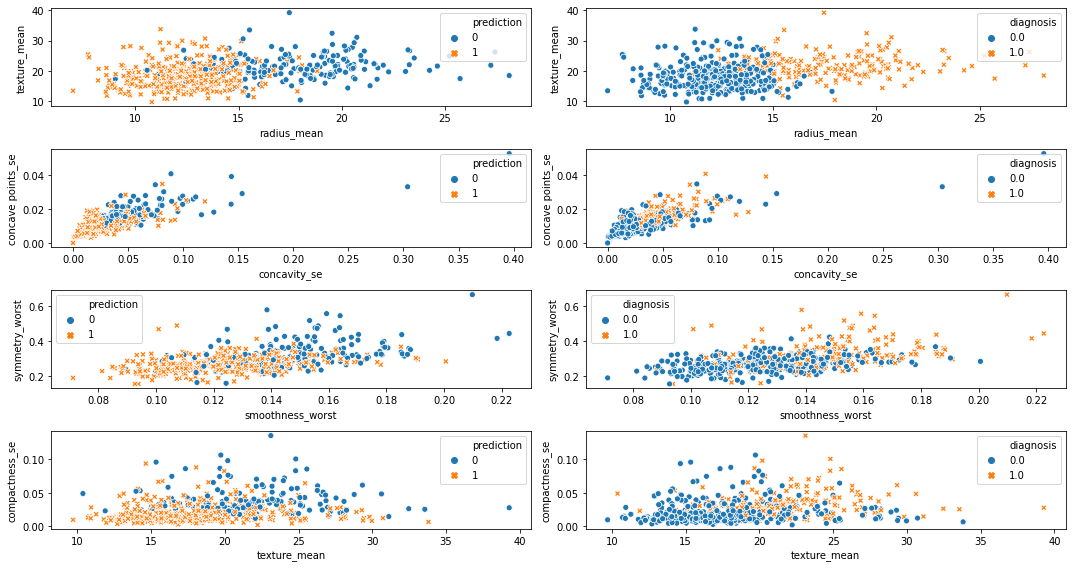

Accuracy of original and normalized data 0.9279437609841827


In [224]:
plt.clf()
acc_orNor=grapher(df_orNor_pred.toPandas())
print("Accuracy of original and normalized data "+str(acc_orNor))

#Classifaction

In [0]:
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix,recall_score,precision_score
from sklearn import metrics

def minMaxScalerClassifier(classer):
  assembler = VectorAssembler(inputCols=list(set(classer.columns)-{"id","diagnosis"}), outputCol="features")
  scaler = MinMaxScaler(inputCol="features", outputCol="nor_features")
  pipeline = Pipeline(stages=[assembler, scaler])
  scalerModel = pipeline.fit(classer)
  scaledData = scalerModel.transform(classer).select('id',"diagnosis", 'features', 'nor_features')
  scaledData.show(1,False)
  return scaledData
def accuracies_dict(category_name,y_true, y_pred):
  f1 = f1_score(y_true,y_pred)
  accuracy = accuracy_score(y_true, y_pred, normalize=False)/y_true.size
  recallScore = recall_score(y_true,y_pred)
  precisionScore = precision_score(y_true,y_pred)
  tempDict = {"category":category_name,"f1":f1,"accuracy":accuracy,"recall score":recallScore,"precision score":precisionScore}
  print(category_name + "\n" + classification_report(y_true, y_pred))
  return tempDict

I created train and test data from featured which has less column, pySpark dataframe in here.

+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|id    |diagnosis|features                                                                                                                                                                     |nor_features                                                                                                                                          

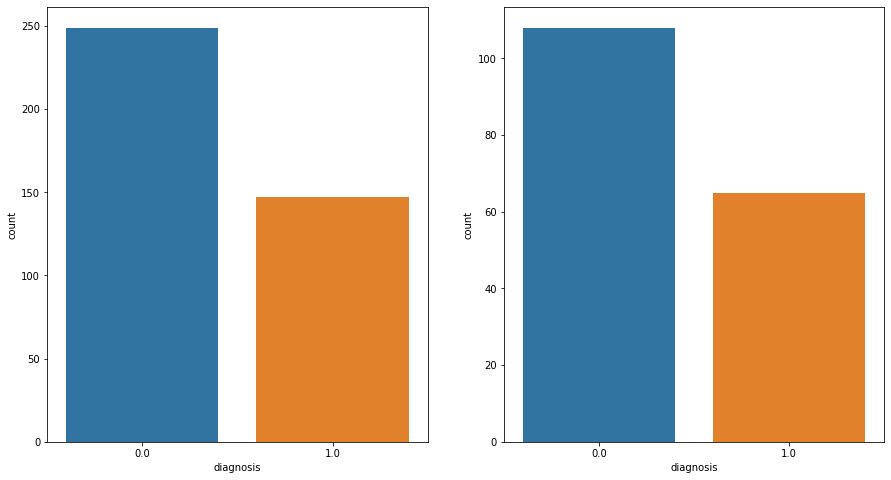

In [226]:
featuredDataCls = minMaxScalerClassifier(df_dropped)
originalDataCls = minMaxScalerClassifier(df)



(trainingFeaturedData, testFeaturedData) = featuredDataCls.randomSplit([0.7, 0.3])
print(trainingFeaturedData.join(df,"id"))
pandasTempTrain = trainingFeaturedData.toPandas()
pandasTempTest = testFeaturedData.toPandas()
f, axes = plt.subplots(1, 2,figsize=(15,8))

sns.countplot(pandasTempTrain.diagnosis,ax = axes[0])
sns.countplot(pandasTempTest.diagnosis,ax = axes[1])


I checked distrubiton of malign and bening objects on featured(less column) test and data. It looks good.

In [227]:
trainingFeaturedData.show(5,False)
testFeaturedData.show(5)

+-----+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|id   |diagnosis|features                                                                                                                                                                              |nor_features                                                                                                            

I created train and test data from orginal pySpark dataframe in here.

DataFrame[id: int, diagnosis: float, features: vector, nor_features: vector, diagnosis: float, radius_mean: double, texture_mean: double, perimeter_mean: double, area_mean: double, smoothness_mean: double, compactness_mean: double, concavity_mean: double, concave points_mean: double, symmetry_mean: double, fractal_dimension_mean: double, radius_se: double, texture_se: double, perimeter_se: double, area_se: double, smoothness_se: double, compactness_se: double, concavity_se: double, concave points_se: double, symmetry_se: double, fractal_dimension_se: double, radius_worst: double, texture_worst: double, perimeter_worst: double, area_worst: double, smoothness_worst: double, compactness_worst: double, concavity_worst: double, concave points_worst: double, symmetry_worst: double, fractal_dimension_worst: double]


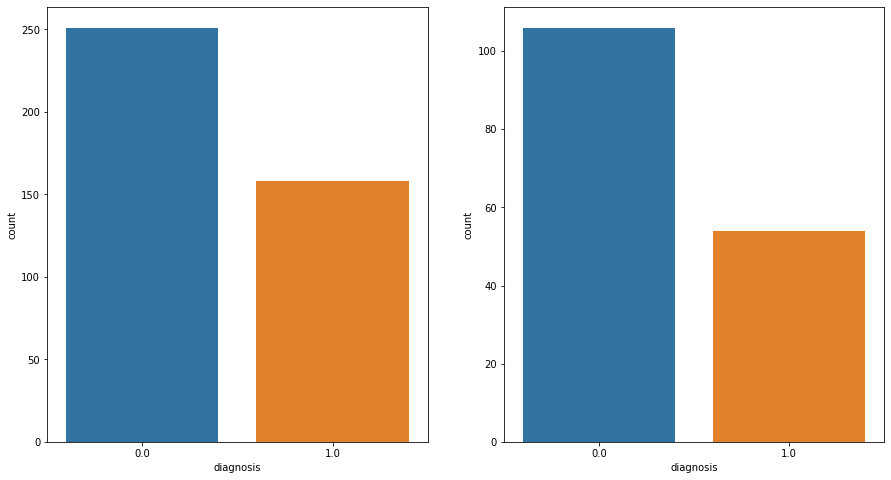

In [228]:
(trainingOriginalData, testOriginalData) = originalDataCls.randomSplit([0.7, 0.3])
print(trainingOriginalData.join(df,"id"))
pandasTempTrain = trainingOriginalData.toPandas()
pandasTempTest = testOriginalData.toPandas()
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.countplot(pandasTempTrain.diagnosis,ax = axes[0])
sns.countplot(pandasTempTest.diagnosis,ax = axes[1])


I checked distrubiton of malign and bening objects on original(has same column with orignal dataframe) test and data. It looks good.

In [229]:
trainingOriginalData.show(5,False)
testOriginalData.show(5)

+-----+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|id   |diagnosis|features                                                                                                                                              

In [0]:
def plot_confusion_matrix(y_true, y_pred,normalized=False):
  cm = metrics.confusion_matrix(y_true, y_pred)

  if normalized:
        print("Normalized confusion matrix")
  else:
        print('Confusion matrix, without normalization')

  group_names = ["True Neg","False Pos","False Neg","True Pos"]
  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap="Reds")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')  


In [0]:
listDict = []

In [232]:


log = LogisticRegression(featuresCol='features', labelCol='diagnosis')
logM = log.fit(trainingOriginalData)
prediction = logM.transform(testOriginalData)
prediction.show(5,False)



+-----+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------+---------------------------+----------+
|id   |diagnosis|features                                                          

In [233]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="diagnosis", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(prediction)
print("Accuracy = %g" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.90625
Test Error = 0.09375


In [234]:
y_true = prediction.select("diagnosis")
y_true = y_true.toPandas()

y_pred = prediction.select("prediction")
y_pred = y_pred.toPandas()

orNotNor = accuracies_dict("Original and Not Normalized Data",y_true,y_pred)
listDict.append(orNotNor)

Original and Not Normalized Data
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       106
         1.0       0.85      0.87      0.86        54

    accuracy                           0.91       160
   macro avg       0.89      0.90      0.90       160
weighted avg       0.91      0.91      0.91       160



Confusion matrix, without normalization


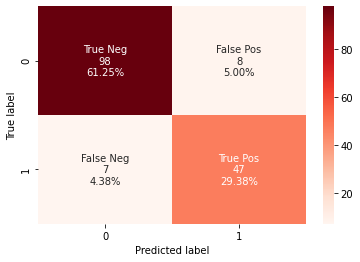

In [235]:
plot_confusion_matrix(y_true,y_pred)

In [236]:
log = LogisticRegression(featuresCol='nor_features', labelCol='diagnosis')
logM = log.fit(trainingOriginalData)
prediction = logM.transform(testOriginalData)
prediction.show(5,False)

+-----+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------+----------------------------+----------+
|id   |diagnosis|features                                                         

In [237]:
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="diagnosis", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(prediction)
print("Accuracy = %g" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.89375
Test Error = 0.10625


In [238]:
y_true = prediction.select("diagnosis")
y_true = y_true.toPandas()

y_pred = prediction.select("prediction")
y_pred = y_pred.toPandas()


orNor = accuracies_dict("Original and Normalized Data",y_true,y_pred)
listDict.append(orNor)

Original and Normalized Data
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       106
         1.0       0.80      0.91      0.85        54

    accuracy                           0.89       160
   macro avg       0.88      0.90      0.88       160
weighted avg       0.90      0.89      0.90       160



Normalized confusion matrix


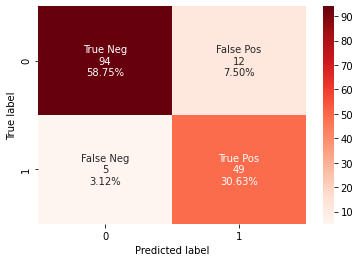

In [239]:
plot_confusion_matrix(y_true,y_pred,normalized=True)

In [240]:
log = LogisticRegression(featuresCol='features', labelCol='diagnosis')
logM = log.fit(trainingFeaturedData)
prediction = logM.transform(testFeaturedData)
prediction.show(5,False)

+-----+---------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------+-------------------------------------------+----------+
|id   |diagnosis|features                                                                                                                                                                            |nor_features             

In [241]:
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="diagnosis", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(prediction)
print("Accuracy = %g" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.976879
Test Error = 0.0231214


In [242]:
y_true = prediction.select("diagnosis")
y_true = y_true.toPandas()

y_pred = prediction.select("prediction")
y_pred = y_pred.toPandas()


feNotNor = accuracies_dict("Featured and Not Normalized Data",y_true,y_pred)
listDict.append(feNotNor)

Featured and Not Normalized Data
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       108
         1.0       0.97      0.97      0.97        65

    accuracy                           0.98       173
   macro avg       0.98      0.98      0.98       173
weighted avg       0.98      0.98      0.98       173



Confusion matrix, without normalization


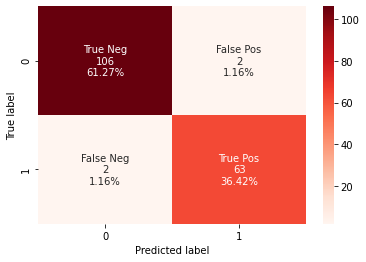

In [243]:
plot_confusion_matrix(y_true,y_pred)

In [244]:
log = LogisticRegression(featuresCol='nor_features', labelCol='diagnosis')
logM = log.fit(trainingFeaturedData)
prediction = logM.transform(testFeaturedData)
prediction.show(5,False)

+-----+---------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------+-------------------------------------------+----------+
|id   |diagnosis|features                                                                                                                                                                            |nor_features             

In [245]:
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="diagnosis", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(prediction)
print("Accuracy = %g" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.959538
Test Error = 0.0404624


In [246]:
y_true = prediction.select("diagnosis")
y_true = y_true.toPandas()

y_pred = prediction.select("prediction")
y_pred = y_pred.toPandas()


feNor = accuracies_dict("Featured and Normalized Data",y_true,y_pred)
listDict.append(feNor)

Featured and Normalized Data
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       108
         1.0       0.94      0.95      0.95        65

    accuracy                           0.96       173
   macro avg       0.96      0.96      0.96       173
weighted avg       0.96      0.96      0.96       173



Normalized confusion matrix


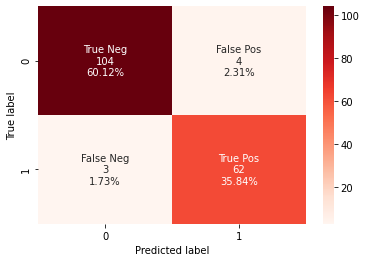

In [247]:
plot_confusion_matrix(y_true,y_pred,normalized=True)

In [0]:
pandas_temp = pd.DataFrame(listDict)  


In [249]:
pandas_temp.columns

Index(['category', 'f1', 'accuracy', 'recall score', 'precision score'], dtype='object')

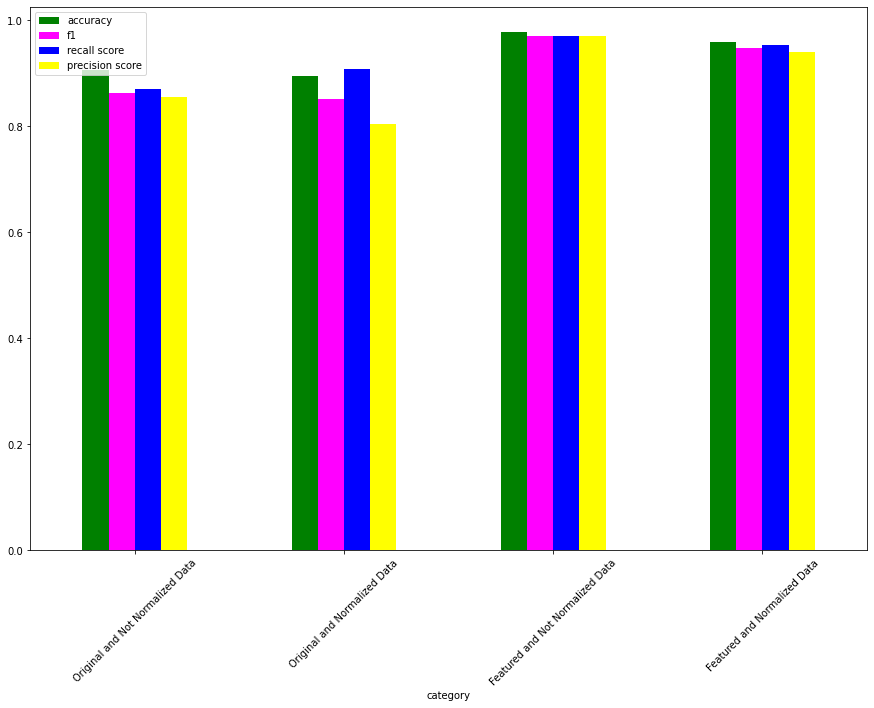

In [250]:
pandas_temp.plot(x="category", y=["accuracy", "f1", "recall score", "precision score"],rot=45,color=["green","magenta","blue","yellow"], kind="bar",figsize=(15,10))


In [251]:
print(pandas_temp)


                           category        f1  ...  recall score  precision score
0  Original and Not Normalized Data  0.862385  ...      0.870370         0.854545
1      Original and Normalized Data  0.852174  ...      0.907407         0.803279
2  Featured and Not Normalized Data  0.969231  ...      0.969231         0.969231
3      Featured and Normalized Data  0.946565  ...      0.953846         0.939394

[4 rows x 5 columns]



**Disclaimer!** <font color='grey'>This notebook was prepared by Ahmet Kasım Toptas as an assignment for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.